In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [33]:
DATA_SET = pd.read_csv('./hrt.csv')
DATA_SET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
DATA_SET = pd.get_dummies(DATA_SET, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
DATA_SET.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [35]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
DATA_SET[columns_to_scale] = standardScaler.fit_transform(DATA_SET[columns_to_scale])
DATA_SET.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [36]:
Y = DATA_SET['target'].values
X = DATA_SET.drop(['target'], axis = 1).values

In [37]:
def get_score(model):
    ssplit=ShuffleSplit(n_splits=10,test_size=0.25,random_state = 0)
    results=cross_val_score(model,X,Y,cv=ssplit)
    return np.mean(results)

# Check For AddaBoost

## KNN - BOOSTING

In [46]:
KNN_scores = []
for k in range(1,21,1):
    model_KNN = KNeighborsClassifier(n_neighbors = k)
    boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_KNN,learning_rate=1, random_state = 0)
    KNN_scores.append(get_score(boosting_model)*100)

C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boo

C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boo

C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\gnanesh\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_weight_boo

## SVM - BOOSTING


In [ ]:
SVM_scores = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    model_SVM = SVC(kernel = kernels[i],probability=True)
    boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_SVM,learning_rate=1, random_state = 0)
    SVM_scores[kernels[i]] = (get_score(boosting_model))
SVM_scores

In [ ]:
model_SVM = SVC(kernel = 'rbf',probability=True)
get_score(AdaBoostClassifier(n_estimators=50, base_estimator=model_SVM,learning_rate=1, random_state = 0)) * 100


# DT - BOOSTING

In [49]:
DT_scores = []
for i in range(1, len(DATA_SET.columns)):
    model_DT = DecisionTreeClassifier(max_features = i, random_state = 0,)
    boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_DT,learning_rate=1, random_state = 0) 
    DT_scores.append(get_score(boosting_model))
DT_scores

[0.7236842105263158,
 0.7486842105263158,
 0.7381578947368421,
 0.7539473684210526,
 0.75,
 0.7447368421052631,
 0.756578947368421,
 0.7342105263157894,
 0.7394736842105263,
 0.7539473684210527,
 0.7723684210526316,
 0.7776315789473685,
 0.786842105263158,
 0.7552631578947369,
 0.7605263157894737,
 0.7592105263157893,
 0.7776315789473685,
 0.756578947368421,
 0.756578947368421,
 0.7578947368421052,
 0.7763157894736843,
 0.7526315789473684,
 0.773684210526316,
 0.7710526315789473,
 0.7552631578947369,
 0.7618421052631579,
 0.7697368421052633,
 0.7618421052631579,
 0.775,
 0.7657894736842106]

Text(0.5, 1.0, 'DT Classifier Accuracy for different Max Features')

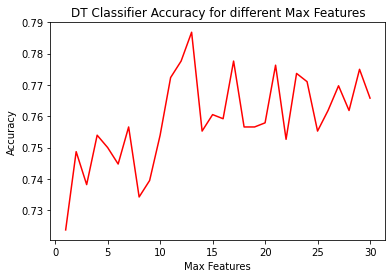

In [50]:
plt.plot([k for k in range(1, len(DATA_SET.columns))], DT_scores, color = 'red')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('DT Classifier Accuracy for different Max Features')

In [51]:
max_DT_score  = -1
max_feature = -1
for index, val in enumerate(DT_scores):
    if(max_DT_score < val):
        max_DT_score = val
        max_feature = index + 1
max_feature

13

In [52]:
model_DT = DecisionTreeClassifier(max_features = max_feature, random_state = 0)
boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_DT,learning_rate=1, random_state = 0) 
get_score(boosting_model)*100

78.6842105263158

## RF - BOOSTING

In [53]:
model_RF = RandomForestClassifier(n_estimators = 100, random_state = 0)
boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_RF,learning_rate=1, random_state = 0) 
(get_score(boosting_model)*100)

82.5

## Naive Bayes - BOOSTING

In [54]:
model_NB = GaussianNB()
boosting_model = AdaBoostClassifier(n_estimators=50, base_estimator=model_NB,learning_rate=1, random_state = 0)
(get_score(boosting_model)*100)

59.86842105263158